In [1]:
LDAtopics = [ ['miss', 'hill', 'search', 'inquiri','call','famili','polic','abus','health','report'],
           ['fund', 'council', 'cut', 'plan','mine','job','market','rise','rate','school'],
              ['elect', 'labor', 'minist', 'vote','australia','rudd','leader','asylum','parti','abbott'],
              ['interview', 'dai', 'speak', 'test','win','ash','pacif','australia','final','beat'],
              ['fire', 'warn', 'water', 'plan','flood','bushfir','council','resid','power','mine'],
              ['crash', 'countri', 'kill', 'coast','hit','hour','car','di','train','fire'],
              ['farmer', 'nrn', 'farm', 'cattl','rain','dairi','export','food','drought','grower'],
              ['rural', 'abc', 'nation', 'busi','new','weather','market','sa','report','sport'],
              ['polic', 'charg', 'court', 'murder','accus','jail','trial','arrest','drug','assault'],
              ['win', 'ban', 'afl', 'take','race','call','week','set','black','tour']]

BERTopics =  [ ['armed','robbery', 'sexual', 'cannabis', 'priest', 'bikie', 'robber', 'bikies', 'offender', 'bashing'],
           ['firefighter', 'bushfires', 'arson', 'burning','rf','blaze','destroys','burn','grassfire', 'crew'],
              ['mariner','rooster','bulldog','eagle','nrl','brumbies','bronco','wanderer','roar','knight'],
              ['trent','robinson','griffin','elliott','extended','josh','wayne','bennett','johnathan','matthew'],
              ['dam','irrigation','flooding','levee','mitigation','allocation','floodwaters','sewerage','basin','flash'],
              ['motorcyclist','pedestrian','drowns','rider','accident','motorbike','collision','cyclist','fiery','crashing'],
              ['ore','iron','miner','seam','quarry','coal','mineral','nickel','copper','exploration'],
              ['wheat','grain','agriculture','horticulture','agricultural','onion','farming','hay','gmo','usda'],
              ['spying','vanuatu','spy','nsa','nauru','papua','timor','indonesian','seeker','wikileaks'],
              ['nurse','nursing','medical','springborg','clinic','moura','bed','elective','payroll','doctor']]

In [2]:
LDAstrings = [' '.join(lst) for lst in LDAtopics]

for string in LDAstrings:
    print(string)

miss hill search inquiri call famili polic abus health report
fund council cut plan mine job market rise rate school
elect labor minist vote australia rudd leader asylum parti abbott
interview dai speak test win ash pacif australia final beat
fire warn water plan flood bushfir council resid power mine
crash countri kill coast hit hour car di train fire
farmer nrn farm cattl rain dairi export food drought grower
rural abc nation busi new weather market sa report sport
polic charg court murder accus jail trial arrest drug assault
win ban afl take race call week set black tour


In [3]:
BERTopicstrings = [' '.join(lst) for lst in BERTopics]

for string in BERTopicstrings:
    print(string)

armed robbery sexual cannabis priest bikie robber bikies offender bashing
firefighter bushfires arson burning rf blaze destroys burn grassfire crew
mariner rooster bulldog eagle nrl brumbies bronco wanderer roar knight
trent robinson griffin elliott extended josh wayne bennett johnathan matthew
dam irrigation flooding levee mitigation allocation floodwaters sewerage basin flash
motorcyclist pedestrian drowns rider accident motorbike collision cyclist fiery crashing
ore iron miner seam quarry coal mineral nickel copper exploration
wheat grain agriculture horticulture agricultural onion farming hay gmo usda
spying vanuatu spy nsa nauru papua timor indonesian seeker wikileaks
nurse nursing medical springborg clinic moura bed elective payroll doctor


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np



# Topic strings into numerical representations
vectorizer = TfidfVectorizer()
topic_vectors = vectorizer.fit_transform(LDAstrings)

# Calculating the inter-topic distance using Cosine similarity
inter_topic_distance = 1 - cosine_similarity(topic_vectors)

# Computing the average inter-topic distance
LDATopicDiversity = np.mean(inter_topic_distance)

print("Average LDA Inter-Topic Distance:", LDATopicDiversity)

Average LDA Inter-Topic Distance: 0.8843157174333729


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()
topic_vectors = vectorizer.fit_transform(BERTopicstrings)


inter_topic_distance = 1 - cosine_similarity(topic_vectors)

BERTopicTopicDiversity = np.mean(inter_topic_distance)

print("Average BERTopic Inter-Topic Distance:", BERTopicTopicDiversity)

Average BERTopic Inter-Topic Distance: 0.9


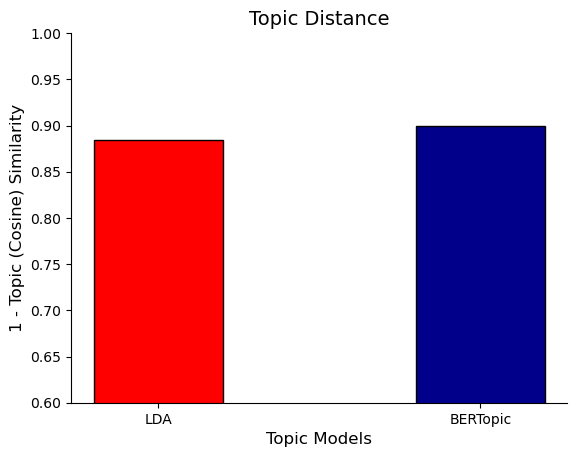

In [4]:
import matplotlib.pyplot as plt


LDATopicDiversity = 0.884
BERTopicTopicDiversity = 0.900

x = [1, 2]


heights = [LDATopicDiversity, BERTopicTopicDiversity]

labels = ['LDA', 'BERTopic']

colors = ['red', 'darkblue']


plt.bar(x, heights, color=colors, width=0.4, edgecolor='black')


plt.xlabel('Topic Models', fontsize=12)
plt.ylabel('1 - Topic (Cosine) Similarity', fontsize=12)
plt.xticks(x, labels, fontsize=10)
plt.ylim(0.6, 1)

plt.title('Topic Distance', fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.show()

In [7]:
import gensim, fasttext

In [8]:
from diversity_metrics import *
from gensim.test.utils import datapath
from gensim.models import KeyedVectors

In [9]:
import gensim
wv = gensim.models.fasttext.load_facebook_model('cc.en.300.bin.gz')

In [10]:
print("puw:",proportion_unique_words(LDAtopics, topk=10))
print("jd:", pairwise_jaccard_diversity(LDAtopics, topk=10))
print("we-pd:", pairwise_word_embedding_distance(LDAtopics, wv, topk=10))
print("we-cd:", centroid_distance(LDAtopics, wv, topk=10))
print("irbo p=0.5:",irbo(LDAtopics, weight=0.5, topk=10))
print("irbo p=0.9:",irbo(LDAtopics, weight=0.9, topk=10))
print("we-irbo p=0.5:",word_embedding_irbo(LDAtopics,wv, weight=0.5, topk=10))
print("we-irbo p=0.9:",word_embedding_irbo(LDAtopics,wv, weight=0.9, topk=10))

puw: 0.9
jd: 0.987891296869625
we-pd: 0.8868992154886363
we-cd: 0.609012475097227
irbo p=0.5: 0.9988994640101411
irbo p=0.9: 0.9870600480785714
we-irbo p=0.5: 0.8602179404905194
we-irbo p=0.9: 0.8082666843613722


In [11]:
print("puw:",proportion_unique_words(BERTopics, topk=10))
print("jd:", pairwise_jaccard_diversity(BERTopics, topk=10))
print("we-pd:", pairwise_word_embedding_distance(BERTopics, wv, topk=10))
print("we-cd:", centroid_distance(BERTopics, wv, topk=10))
print("irbo p=0.5:",irbo(BERTopics, weight=0.5, topk=10))
print("irbo p=0.9:",irbo(BERTopics, weight=0.9, topk=10))
print("we-irbo p=0.5:",word_embedding_irbo(BERTopics,wv, weight=0.5, topk=10))
print("we-irbo p=0.9:",word_embedding_irbo(BERTopics,wv, weight=0.9, topk=10))

puw: 1.0
jd: 1.0
we-pd: 0.8902665419230048
we-cd: 0.7230834512340227
irbo p=0.5: 1.0
irbo p=0.9: 1.0
we-irbo p=0.5: 0.8655627191488693
we-irbo p=0.9: 0.8389464320249937


In [13]:
import pandas as pd

results = {
    
    "LDAtopics": [
        proportion_unique_words(LDAtopics, topk=10),
        pairwise_jaccard_diversity(LDAtopics, topk=10),
        pairwise_word_embedding_distance(LDAtopics, wv, topk=10),
        centroid_distance(LDAtopics, wv, topk=10),
        irbo(LDAtopics, weight=0.5, topk=10),
        irbo(LDAtopics, weight=0.9, topk=10),
        word_embedding_irbo(LDAtopics, wv, weight=0.5, topk=10),
        word_embedding_irbo(LDAtopics, wv, weight=0.9, topk=10),
    ],
    "BERTopics": [
        proportion_unique_words(BERTopics, topk=10),
        pairwise_jaccard_diversity(BERTopics, topk=10),
        pairwise_word_embedding_distance(BERTopics, wv, topk=10),
        centroid_distance(BERTopics, wv, topk=10),
        irbo(BERTopics, weight=0.5, topk=10),
        irbo(BERTopics, weight=0.9, topk=10),
        word_embedding_irbo(BERTopics, wv, weight=0.5, topk=10),
        word_embedding_irbo(BERTopics, wv, weight=0.9, topk=10),
    ],
}


df = pd.DataFrame.from_dict(results, orient='index', columns=["puw", "jd", "we-pd", "we-cd", "irbo p=0.5", "irbo p=0.9", "we-irbo p=0.5", "we-irbo p=0.9"])

print(df)

           puw        jd     we-pd     we-cd  irbo p=0.5  irbo p=0.9  \
LDAtopics  0.9  0.987891  0.886899  0.609012    0.998899     0.98706   
BERTopics  1.0  1.000000  0.890267  0.723083    1.000000     1.00000   

           we-irbo p=0.5  we-irbo p=0.9  
LDAtopics       0.860218       0.808267  
BERTopics       0.865563       0.838946  


In [18]:
from scipy.spatial import distance
from itertools import combinations

def BERT_pairwise_word_embedding_distance(topics, word_embedding_model, topk=10):
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        count = 0
        sum_dist = 0
        for list1, list2 in combinations(topics, 2):
            count = count+1
            word_counts = 0
            dist = 0
            for word1 in list1[:topk]:
                for word2 in list2[:topk]:
                    # Instead of indexing, we now call the function
                    dist = dist + distance.cosine(word_embedding_model.wv(word1), word_embedding_model.wv(word2))
                    word_counts = word_counts + 1

            dist = dist/word_counts
            sum_dist = sum_dist + dist
        return sum_dist/count


In [19]:
from transformers import BertModel, BertTokenizer

class BertEmbedding:
    def __init__(self, model_name='bert-base-uncased'):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertModel.from_pretrained(model_name)
        self.cache = {}  # Cache for storing word embeddings
        
    def similarity(self, word1, word2):
        vector1 = np.array(self.wv(word1)).reshape(1, -1)
        vector2 = np.array(self.wv(word2)).reshape(1, -1)
        return cosine_similarity(vector1, vector2)[0][0]

    @property
    def vector_size(self):
        return self.model.config.hidden_size

    def wv(self, word):
        # Check if the word has already been processed
        if word in self.cache:
            return self.cache[word]
    
        # Otherwise, calculate the embedding and store it 
        inputs = self.tokenizer.encode_plus(word, return_tensors='pt', max_length=128, padding='max_length')
        outputs = self.model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()[0]
        self.cache[word] = embedding
        return embedding
    
word_embedding_model = BertEmbedding()

In [20]:
from scipy.spatial import distance
from itertools import combinations

def BERT_centroid_distance(topics, word_embedding_model, topk=10):
    
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        centroid_distances = []
        for list1, list2 in combinations(topics, 2):
            centroid1 = np.zeros(word_embedding_model.vector_size)
            centroid2 = np.zeros(word_embedding_model.vector_size)
            for word1 in list1[:topk]:
                centroid1 = centroid1 + word_embedding_model.wv(word1)
            for word2 in list2[:topk]:
                centroid2 = centroid2 + word_embedding_model.wv(word2)
            centroid1 = centroid1 / len(list1[:topk])
            centroid2 = centroid2 / len(list2[:topk])
            centroid_distances.append(distance.cosine(centroid1, centroid2))
            
        return np.mean(centroid_distances)

In [21]:
print("puw:",proportion_unique_words(LDAtopics, topk=10))
print("jd:", pairwise_jaccard_diversity(LDAtopics, topk=10))
print("we-pd:", BERT_pairwise_word_embedding_distance(LDAtopics, word_embedding_model, topk=10))
print("we-cd:", BERT_centroid_distance(LDAtopics, word_embedding_model, topk=10))
print("irbo p=0.5:",irbo(LDAtopics, weight=0.5, topk=10))
print("irbo p=0.9:",irbo(LDAtopics, weight=0.9, topk=10))
print("we-irbo p=0.5:",BERT_word_embedding_irbo(LDAtopics,word_embedding_model, weight=0.5, topk=10))
print("we-irbo p=0.9:",BERT_word_embedding_irbo(LDAtopics,word_embedding_model, weight=0.9, topk=10))


puw: 0.9
jd: 0.987891296869625
we-pd: 0.3133775993916723
we-cd: 0.05931158021039115
irbo p=0.5: 0.9988994640101411
irbo p=0.9: 0.9870600480785714
we-irbo p=0.5: 0.31821218137945106
we-irbo p=0.9: 0.2849476441284575


In [22]:
print("puw:",proportion_unique_words(BERTopics, topk=10))
print("jd:", pairwise_jaccard_diversity(BERTopics, topk=10))
print("we-pd:", BERT_pairwise_word_embedding_distance(BERTopics, word_embedding_model, topk=10))
print("we-cd:", BERT_centroid_distance(BERTopics, word_embedding_model, topk=10))
print("irbo p=0.5:",irbo(BERTopics, weight=0.5, topk=10))
print("irbo p=0.9:",irbo(BERTopics, weight=0.9, topk=10))
print("we-irbo p=0.5:",BERT_word_embedding_irbo(BERTopics,word_embedding_model, weight=0.5, topk=10))
print("we-irbo p=0.9:",BERT_word_embedding_irbo(BERTopics,word_embedding_model, weight=0.9, topk=10))

puw: 1.0
jd: 1.0
we-pd: 0.31979590678215025
we-cd: 0.09959604163670327
irbo p=0.5: 1.0
irbo p=0.9: 1.0
we-irbo p=0.5: 0.31428020157517833
we-irbo p=0.9: 0.29201270284588543


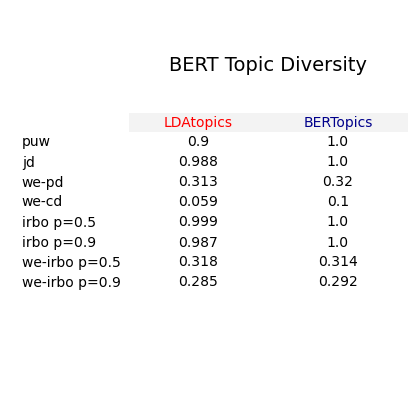

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the metrics for each topic
data = {
    'puw': [proportion_unique_words(LDAtopics, topk=10), proportion_unique_words(BERTopics, topk=10)],
    'jd': [pairwise_jaccard_diversity(LDAtopics, topk=10), pairwise_jaccard_diversity(BERTopics, topk=10)],
    'we-pd': [BERT_pairwise_word_embedding_distance(LDAtopics, word_embedding_model, topk=10), BERT_pairwise_word_embedding_distance(BERTopics, word_embedding_model, topk=10)],
    'we-cd': [BERT_centroid_distance(LDAtopics, word_embedding_model, topk=10), BERT_centroid_distance(BERTopics, word_embedding_model, topk=10)],
    'irbo p=0.5': [irbo(LDAtopics, weight=0.5, topk=10), irbo(BERTopics, weight=0.5, topk=10)],
    'irbo p=0.9': [irbo(LDAtopics, weight=0.9, topk=10), irbo(BERTopics, weight=0.9, topk=10)],
    'we-irbo p=0.5': [BERT_word_embedding_irbo(LDAtopics, word_embedding_model, weight=0.5, topk=10), BERT_word_embedding_irbo(BERTopics, word_embedding_model, weight=0.5, topk=10)],
    'we-irbo p=0.9': [BERT_word_embedding_irbo(LDAtopics, word_embedding_model, weight=0.9, topk=10), BERT_word_embedding_irbo(BERTopics, word_embedding_model, weight=0.9, topk=10)]
}


df2 = pd.DataFrame(data, index=['LDAtopics', 'BERTopics'])

df2_rounded = df2.round(3)

df2_transposed = df2_rounded.transpose()

fig, ax = plt.subplots(figsize=(3, 5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
plt.title("BERT Topic Diversity", fontsize=14, y=0.82)
tab = plt.table(cellText=df2_transposed.values, colLabels=df2_transposed.columns, rowLabels=df2_transposed.index, loc='center', cellLoc='center', colColours=['#f3f3f3']*df2_transposed.shape[1])
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)

# Customize the font color for 'LDAtopics' and 'BERTopics'
tab[0, 0].set_text_props(color='red')    # 'LDAtopics'
tab[0, 1].set_text_props(color='darkblue')  # 'BERTopics'

for key, cell in tab.get_celld().items():
    cell.set_linewidth(0)
plt.savefig('dataframe_image.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

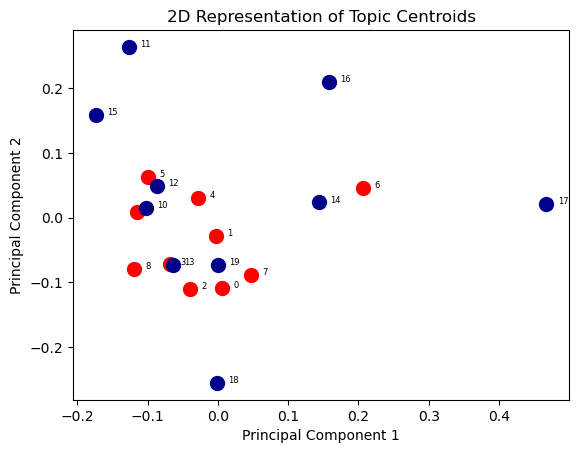

In [51]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

model = SentenceTransformer('all-MiniLM-L6-v2')

def get_centroids(topics):
    centroids = []
    for i, topic in enumerate(topics):
        embeddings = model.encode(topic)
        centroid = np.mean(embeddings, axis=0)  # Calculate the mean along axis 0 to get the centroid
        centroids.append(centroid)
    return centroids

LDA_centroids = get_centroids(LDAtopics)
BERT_centroids = get_centroids(BERTopics)


all_centroids = np.concatenate((LDA_centroids, BERT_centroids), axis=0)


pca = PCA(n_components=2)
reduced_dim_data = pca.fit_transform(all_centroids)


plt.scatter(reduced_dim_data[len(LDAtopics):, 0], reduced_dim_data[len(LDAtopics):, 1], color='darkblue', s=100)


offset = 0.025 * (max(reduced_dim_data[:, 0]) - min(reduced_dim_data[:, 0]))  # Adjust as needed
for i in range(len(LDAtopics) + len(BERTopics)):
    plt.annotate(str(i), (reduced_dim_data[i, 0] + offset, reduced_dim_data[i, 1]), fontsize=6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Topic Centroids')
plt.show()


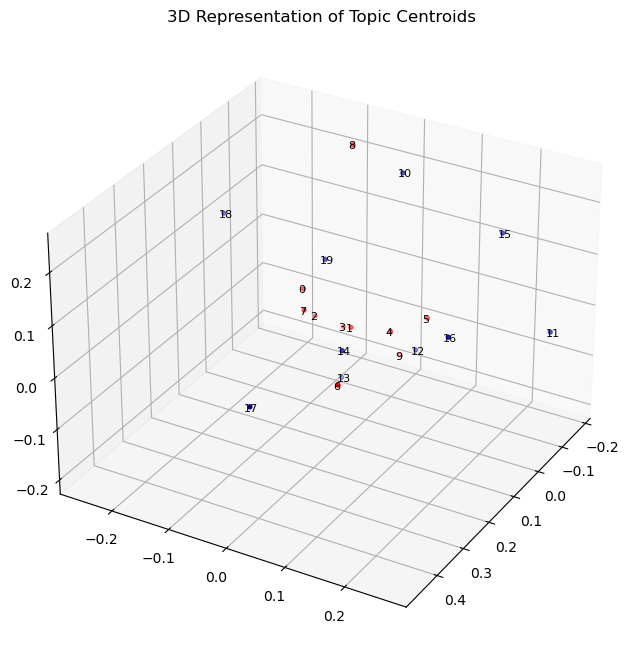

In [86]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
reduced_dim_data = pca.fit_transform(all_centroids)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(reduced_dim_data[:len(LDAtopics), 0], reduced_dim_data[:len(LDAtopics), 1], reduced_dim_data[:len(LDAtopics), 2], color='red', s=8)

ax.scatter(reduced_dim_data[len(LDAtopics):, 0], reduced_dim_data[len(LDAtopics):, 1], reduced_dim_data[len(LDAtopics):, 2], color='darkblue', s=8)

# Annotate the points
offset = 0.03 * (max(reduced_dim_data[:, 0]) - min(reduced_dim_data[:, 0]))  
for i in range(len(LDAtopics) + len(BERTopics)):
    ax.text(reduced_dim_data[i, 0] + offset, reduced_dim_data[i, 1], reduced_dim_data[i, 2], str(i), fontsize=8)

plt.title('3D Representation of Topic Centroids')

ax.view_init(elev=30, azim=30)

plt.show()